# Parte 1 - Oportunidades Bitcoin

En esta primera parte trabajaremos con APIs REST para buscar oportunidades de arbitraje con Bitcoin1. La idea es intentar buscar oportunidades en la que saliese rentable vender bitcoins en una moneda nacional (por ejemplo, en dólares), para después cambiar esa moneda fiat por otra (por ejemplo, Euros), y recomprar bitcoins.

 Por ejemplo, si tengo 1 BTC e instantáneamente (el que sea instantáneo es irreal, pero lo asumimos por simplicidad) que se vende por 1000 USD, y el tipo de cambio EUR/USD es 0.99, podría primero obtener los 1000 USD en una operación de venta, y con eso comprar 990 EUR. Si el precio de compra de 1 BTC es 980, podría adquirir el bitcoin original y aún me quedarían 10 EUR.

Para ello trabajaremos con el API REST de BlockChain.info para tipos de cambio: 
https://blockchain.info/es/api/exchange_rates_api 

Como puede verse, nos da una valoración instantánea de 1 BTC en diferentes monedas fiat.

## Version 1

En una primera versión, haremos un script en Python que simplemente lea los precios en diferentes monedas fiat (tomar solamente tres, por ejemplo, USD, EUR y JPY) de 1 BTC (por ejemplo, en intervalos de 1 minuto o similar), que busque los tipos de intercambio entre algunas de las monedas en otro servicio REST2 y obtenga las oportunidades de compra/venta con arbitraje como la del ejemplo anterior. Nótese que los precios de compra y venta son en general diferentes. 

El script **oportunidadesBitcoin1.py** contiene el código. Cada minuto, lee los precios de venta y de compra de bitcoin en USD, EUR y JPY, lee los tipos de intercambio (EUR a USD y JPY, USD a EUR y JPY, JPY a EUR y USD) y calcula  e imprime por pantalla las oportunidades de compra/venta con arbitraje. 

** NOTA 1 - Se han obtenido datos para cinco minutos. En el código del script se puede modificar la variable mostrados_max para que obtenga más datos.**

** NOTA 2 - Se muestran los valores enteros de cada moneda **

In [5]:
run oportunidadesBitcoin1.py

Tiempo: 2017-03-07 10:33:31
Oportunidad Dolar a Euro: 1
Oportunidad Dolar a Yen: 165
Oportunidad Euro a Dolar: 3
Oportunidad Euro a Yen: 263
Oportunidad Yen a Euro: 2
Oportunidad Yen a Dolar: 4


Tiempo: 2017-03-07 10:34:32
Oportunidad Dolar a Euro: 1
Oportunidad Dolar a Yen: 165
Oportunidad Euro a Dolar: 3
Oportunidad Euro a Yen: 263
Oportunidad Yen a Euro: 2
Oportunidad Yen a Dolar: 4


Tiempo: 2017-03-07 10:35:33
Oportunidad Dolar a Euro: 1
Oportunidad Dolar a Yen: 165
Oportunidad Euro a Dolar: 3
Oportunidad Euro a Yen: 263
Oportunidad Yen a Euro: 2
Oportunidad Yen a Dolar: 4


Tiempo: 2017-03-07 10:36:33
Oportunidad Dolar a Euro: 2
Oportunidad Dolar a Yen: 281
Oportunidad Euro a Dolar: 4
Oportunidad Euro a Yen: 380
Oportunidad Yen a Euro: 3
Oportunidad Yen a Dolar: 5


Tiempo: 2017-03-07 10:37:35
Oportunidad Dolar a Euro: 1
Oportunidad Dolar a Yen: 165
Oportunidad Euro a Dolar: 3
Oportunidad Euro a Yen: 263
Oportunidad Yen a Euro: 2
Oportunidad Yen a Dolar: 4




## Versión 2

Basándonos en las ideas de esa primera versión, modificar el script para que grabe en disco en un fichero HDF5 las series temporales de diferencias entre pares de monedas como la descrita en el ejemplo anterior (todas, positivas o negativas). Después, en un Notebook se leerán las series del fichero, obteniendo los máximos y mínimos y dibujando las series para intentar comparar los diferentes pares de monedas. El tiempo será el de la ejecución de cada iteración del script. 

El script oportunidadesBitcoin1.py contiene el código. Cada minuto, lee los precios de venta y de compra de bitcoin en USD, EUR y JPY, lee los tipos de intercambio (EUR a USD y JPY, USD a EUR y JPY, JPY a EUR y USD), calcula las oportunidades de compra/venta con arbitraje y almacena las series en un fichero HDFS llamada 'oportunidadesBitcoin.h5'

** NOTA - Se han guardado valores durante dos horas **

In [6]:
#Importamos bibliotecas necesarias
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
with pd.HDFStore('oportunidadesBitcoin.h5',mode='r') as store:
    datos = store.select('seriesTemporales')

In [8]:
datos.head()

,Oportunidad Dolar a Euro,Oportunidad Dolar a Yen,Oportunidad Euro a Dolar,Oportunidad Euro a Yen,Oportunidad Yen a Dolar,Oportunidad Yen a Euro,Tiempo
0,-5,-14,6,689,0,-5,2017-03-06 10:10:55
1,-3,218,8,922,2,-3,2017-03-06 10:11:56
2,-5,43,6,746,0,-5,2017-03-06 10:12:57
3,-5,43,6,746,0,-5,2017-03-06 10:13:59
4,-5,43,6,746,0,-5,2017-03-06 10:15:00


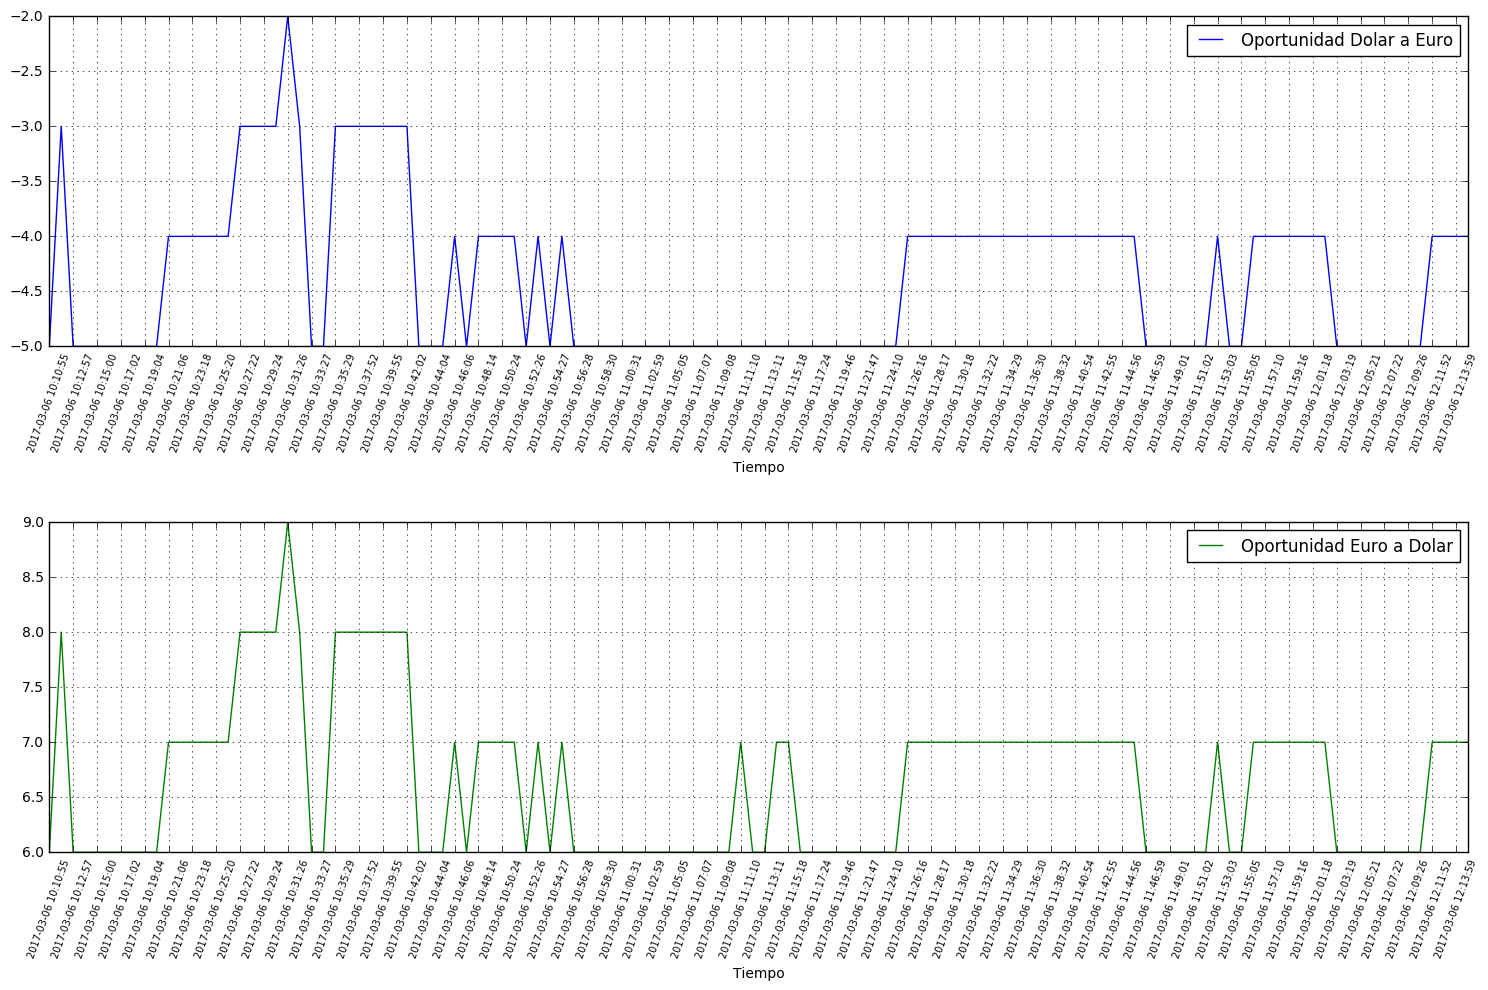

In [19]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex = False, figsize =(15,10))
datos.plot(['Tiempo'], ['Oportunidad Dolar a Euro'], ax = ax1, color = 'blue', grid = True)
datos.plot(['Tiempo'], ['Oportunidad Euro a Dolar'], ax = ax2, color = 'green', grid = True)

ax1.set_xticks(range(0,len(datos['Tiempo']),2))
ax2.set_xticks(range(0,len(datos['Tiempo']),2))
ax1.set_xticklabels(datos['Tiempo'].values[::2])
ax2.set_xticklabels(datos['Tiempo'].values[::2])
                  
plt.setp(ax1.get_xticklabels(), rotation=70, fontsize=7)
plt.setp(ax2.get_xticklabels(), rotation=70, fontsize=7)
plt.tight_layout(w_pad=4, h_pad=3)

In [22]:
print 'Maxima oportunidad venta en USD y compra en EUR:', datos['Oportunidad Dolar a Euro'].max()
print 'Peor oportunidad venta en USD y compra en EUR:', datos['Oportunidad Dolar a Euro'].min()
print 'Maxima oportunidad venta en EUR y compra en USD:', datos['Oportunidad Euro a Dolar'].max()
print 'Peor oportunidad venta en EUR y compra en USD:', datos['Oportunidad Euro a Dolar'].min()

Maxima oportunidad venta en USD y compra en EUR: -2
Peor oportunidad venta en USD y compra en EUR: -5
Maxima oportunidad venta en EUR y compra en USD: 9
Peor oportunidad venta en EUR y compra en USD: 6


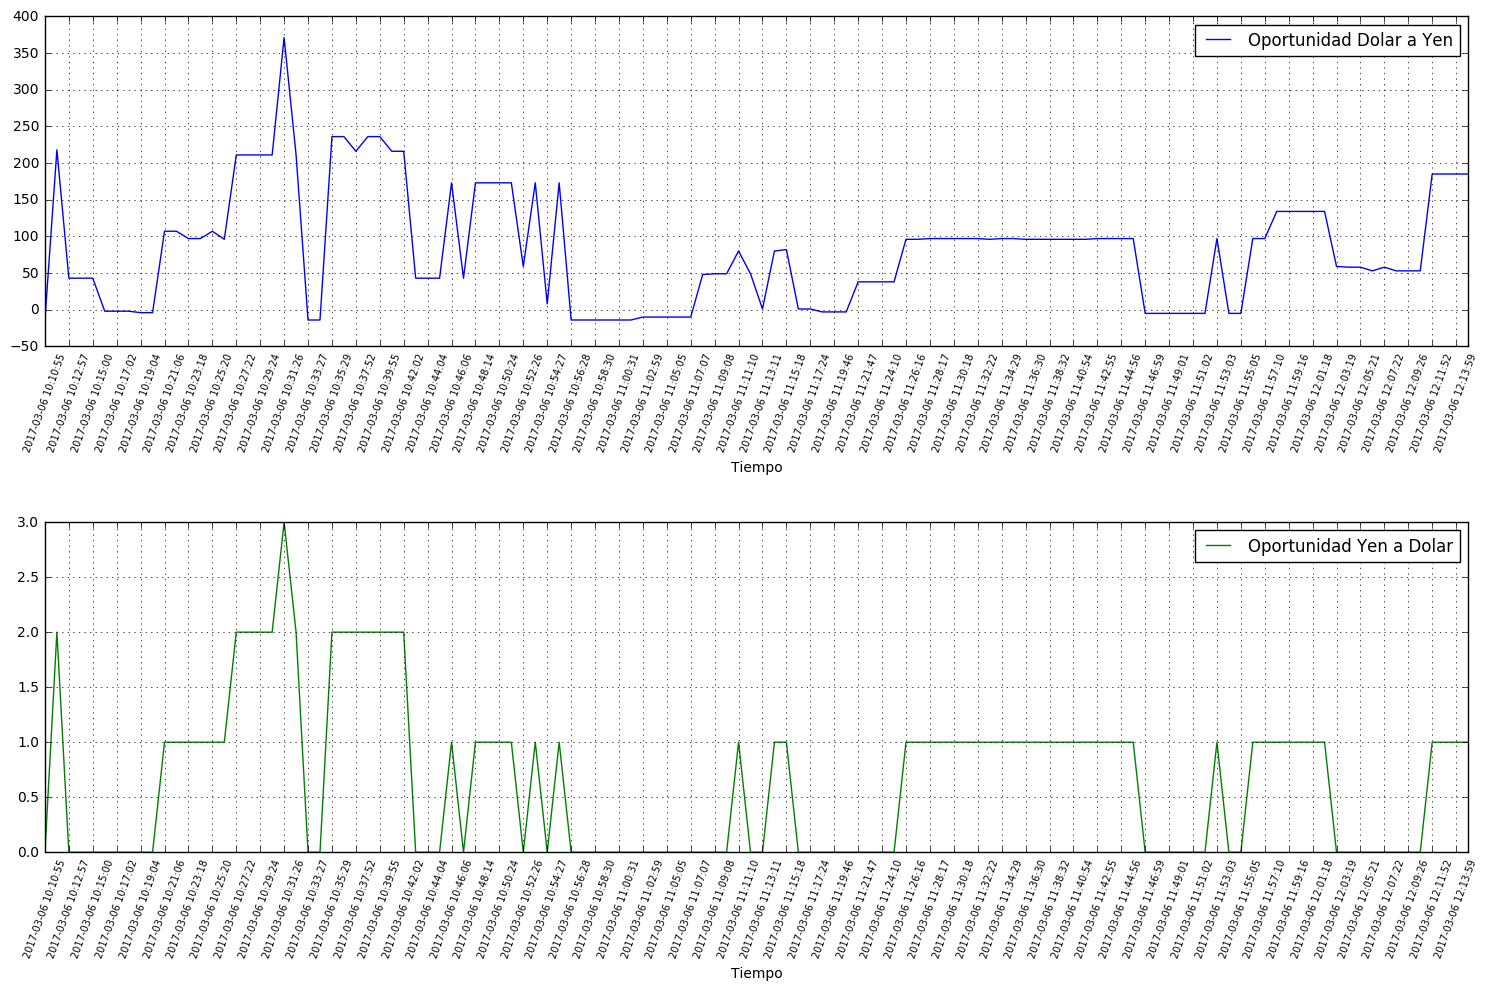

In [20]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex = False, figsize =(15,10))
datos.plot(['Tiempo'], ['Oportunidad Dolar a Yen'], ax = ax1, color = 'blue', grid = True)
datos.plot(['Tiempo'], ['Oportunidad Yen a Dolar'], ax = ax2, color = 'green', grid = True)

ax1.set_xticks(range(0,len(datos['Tiempo']),2))
ax2.set_xticks(range(0,len(datos['Tiempo']),2))
ax1.set_xticklabels(datos['Tiempo'].values[::2])
ax2.set_xticklabels(datos['Tiempo'].values[::2])
                  
plt.setp(ax1.get_xticklabels(), rotation=70, fontsize=7)
plt.setp(ax2.get_xticklabels(), rotation=70, fontsize=7)
plt.tight_layout(w_pad=4, h_pad=3)

In [23]:
print 'Maxima oportunidad venta en USD y compra en JPY:', datos['Oportunidad Dolar a Yen'].max()
print 'Peor oportunidad venta en USD y compra en JPY:', datos['Oportunidad Dolar a Yen'].min()
print 'Maxima oportunidad venta en JPY y compra en USD:', datos['Oportunidad Yen a Dolar'].max()
print 'Peor oportunidad venta en JPY y compra en USD:', datos['Oportunidad Yen a Dolar'].min()

Maxima oportunidad venta en USD y compra en JPY: 371
Peor oportunidad venta en USD y compra en JPY: -14
Maxima oportunidad venta en JPY y compra en USD: 3
Peor oportunidad venta en JPY y compra en USD: 0


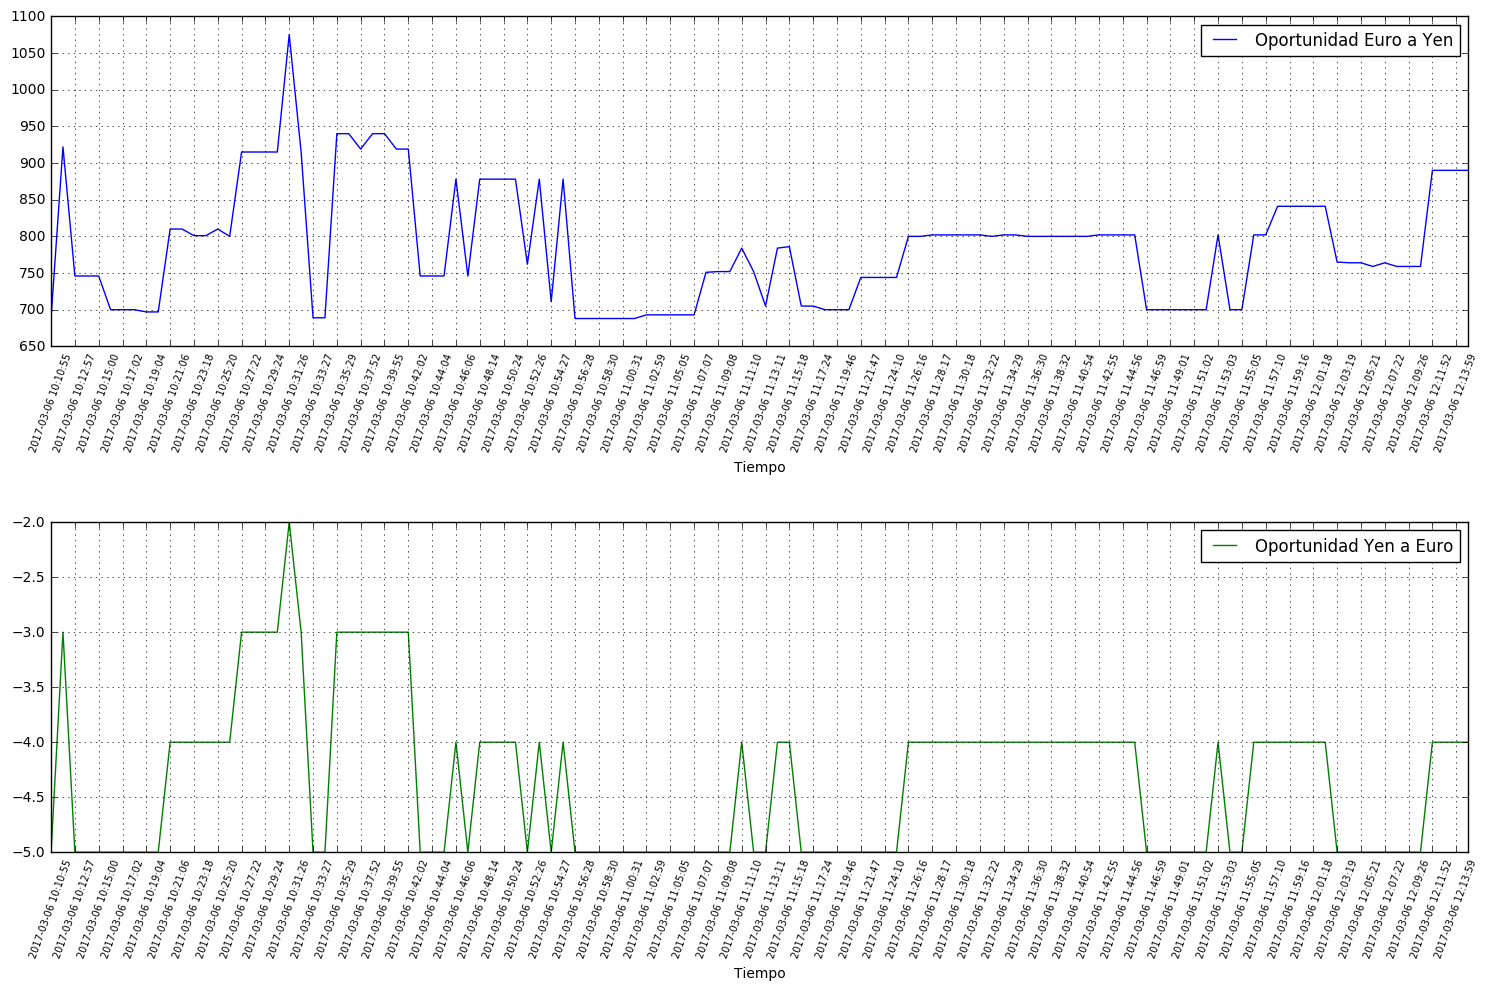

In [21]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex = False, figsize =(15,10))
datos.plot(['Tiempo'], ['Oportunidad Euro a Yen'], ax = ax1, color = 'blue', grid = True)
datos.plot(['Tiempo'], ['Oportunidad Yen a Euro'], ax = ax2, color = 'green', grid = True)

ax1.set_xticks(range(0,len(datos['Tiempo']),2))
ax2.set_xticks(range(0,len(datos['Tiempo']),2))
ax1.set_xticklabels(datos['Tiempo'].values[::2])
ax2.set_xticklabels(datos['Tiempo'].values[::2])
                  
plt.setp(ax1.get_xticklabels(), rotation=70, fontsize=7)
plt.setp(ax2.get_xticklabels(), rotation=70, fontsize=7)
plt.tight_layout(w_pad=4, h_pad=3)

In [24]:
print 'Maxima oportunidad venta en EUR y compra en JPY:', datos['Oportunidad Euro a Yen'].max()
print 'Peor oportunidad venta en EUR y compra en JPY:', datos['Oportunidad Euro a Yen'].min()
print 'Maxima oportunidad venta en JPY y compra en EUR:', datos['Oportunidad Yen a Euro'].max()
print 'Peor oportunidad venta en JPY y compra en EUR:', datos['Oportunidad Yen a Euro'].min()

Maxima oportunidad venta en EUR y compra en JPY: 1075
Peor oportunidad venta en EUR y compra en JPY: 688
Maxima oportunidad venta en JPY y compra en EUR: -2
Peor oportunidad venta en JPY y compra en EUR: -5
